# DATA UPLOAD

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Plastic Waste Around the World.csv')

In [ ]:
df.head(10)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low
5,Brazil,5.96,Consumer_Packaging,1.2,28.1,Medium
6,Indonesia,5.85,Food_Packaging,11.8,21.3,High
7,Russia,5.84,Industrial_Consumer,5.6,40.2,Medium
8,United Kingdom,5.03,Packaging_Consumer,46.2,74.3,Low
9,France,4.98,Packaging_Consumer,27.3,73.1,Low


In [ ]:
df.describe()

,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG
count,165.000000,165.000000,165.000000
mean,1.723515,13.096364,122.255152
std,6.001944,16.687354,222.849695
min,0.010000,0.100000,2.600000
25%,0.120000,1.200000,17.300000
50%,0.510000,5.400000,54.900000
75%,1.330000,16.400000,127.500000
max,59.080000,84.800000,1564.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
Country,0
Total_Plastic_Waste_MT,0
Main_Sources,0
Recycling_Rate,0
Per_Capita_Waste_KG,0
Coastal_Waste_Risk,0


# DATA EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
coastal_risk_counts = df['Coastal_Waste_Risk'].value_counts()
coastal_risk_counts

,count
Coastal_Waste_Risk,
High,78
Low,54
Medium,33


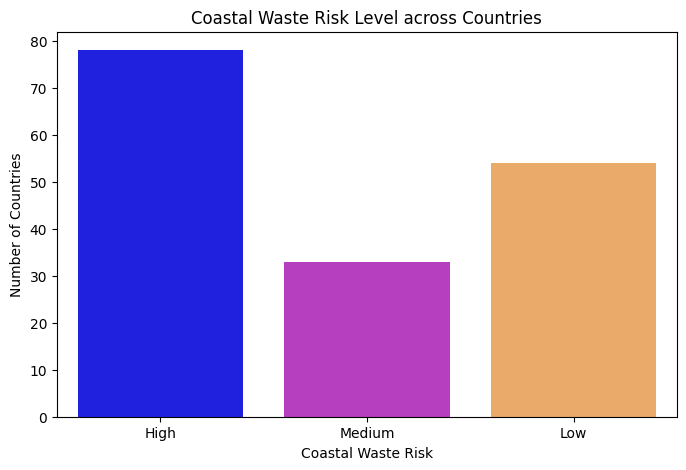

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Coastal_Waste_Risk', palette='gnuplot2')

# Labeling
plt.title('Coastal Waste Risk Level across Countries')
plt.xlabel('Coastal Waste Risk')
plt.ylabel('Number of Countries')
plt.show()

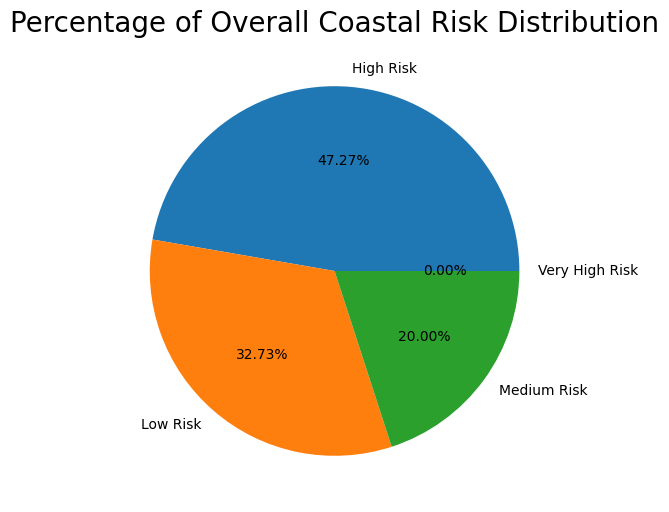

In [ ]:
high_risk = df[df['Coastal_Waste_Risk']=='High']['Coastal_Waste_Risk'].count()
low_risk = df[df['Coastal_Waste_Risk']=='Low']['Coastal_Waste_Risk'].count()
medium_risk = df[df['Coastal_Waste_Risk']=='Medium']['Coastal_Waste_Risk'].count()
very_high_risk = df[df['Coastal_Waste_Risk']=='Very_High']['Coastal_Waste_Risk'].count()

plt.figure(figsize=(10,6))

index_values = [high_risk, low_risk, medium_risk, very_high_risk]
index_labels = ['High Risk', 'Low Risk', 'Medium Risk', 'Very High Risk']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Percentage of Overall Coastal Risk Distribution', fontsize=20)

plt.show()

In [ ]:
main_sources_counts = df['Main_Sources'].value_counts()
main_sources_counts

,count
Main_Sources,
Consumer_Packaging,131
Industrial_Packaging,14
Packaging_Consumer,5
Packaging_Industrial,4
Industrial_Consumer,4
Food_Packaging,3
Automotive_Packaging,1
Packaging_Electronics,1
Consumer_Goods,1


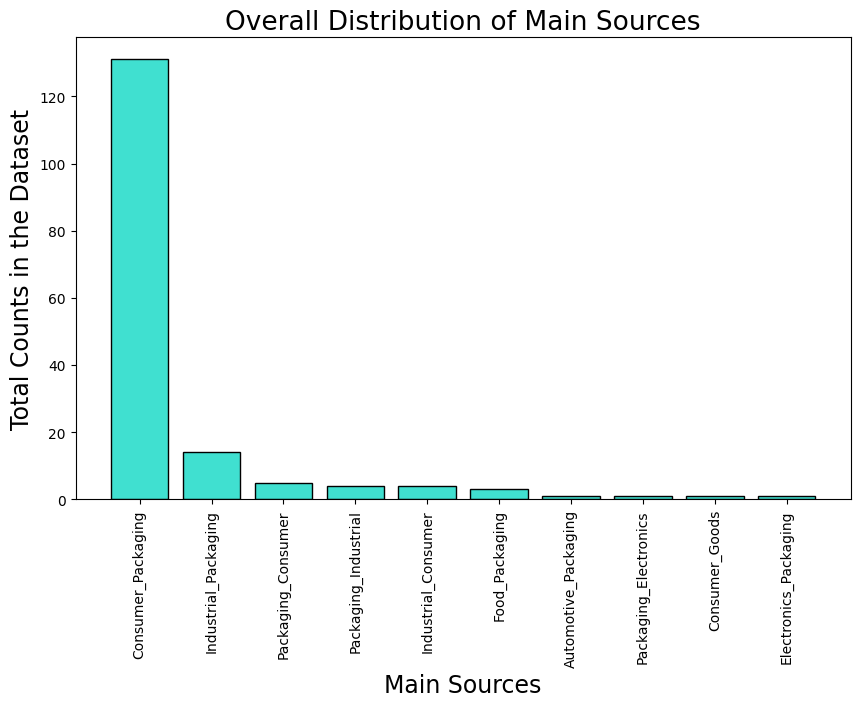

In [ ]:
plt.figure(figsize=(10,6))

plt.bar(main_sources_counts.index, main_sources_counts.values, color='turquoise', edgecolor='black')

plt.xticks(main_sources_counts.index, main_sources_counts.index, rotation = 90)

plt.xlabel('Main Sources', fontsize=17)
plt.ylabel('Total Counts in the Dataset', fontsize=17)

plt.title('Overall Distribution of Main Sources', fontsize=19)

plt.show()

# Machine Learning

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load data
df = pd.read_csv('Plastic Waste Around the World.csv')

# Select only the required raw features
features = ['Total_Plastic_Waste_MT', 'Main_Sources', 'Recycling_Rate', 'Per_Capita_Waste_KG']
target = 'Coastal_Waste_Risk'
df = df[features + [target]]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(df[target])

# Preprocessing pipeline
numeric_features = ['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG']
categorical_features = ['Main_Sources']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Split data
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True)
}

# Train and evaluate each model
for name, model in models.items():
    print("="*60)
    print(f"{name} Model Evaluation")
    print("="*60)

    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))
    print("="*60, "\n")

Random Forest Model Evaluation
Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.92      0.69        13
         Low       0.67      0.36      0.47        11
      Medium       0.60      0.33      0.43         9

    accuracy                           0.58        33
   macro avg       0.60      0.54      0.53        33
weighted avg       0.60      0.58      0.54        33


XGBoost Model Evaluation
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.92      0.73        13
         Low       0.75      0.27      0.40        11
      Medium       0.78      0.78      0.78         9

    accuracy                           0.67        33
   macro avg       0.71      0.66      0.64        33
weighted avg       0.70      0.67      0.63        33


SVM Model Evaluation
Accuracy: 0.58

Classification Report:
              precision    recall  f1-scor